# Kaggle Miniproject 1

## Team Members:
### Karthik Karnik 
### Kapil Sinha
### Anvita Mishra

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from sklearn import tree
from sklearn import base
from sklearn.ensemble import RandomForestClassifier

In [5]:
with open("training_data.txt") as f:
    words = f.readline().split(' ')
training_data = np.loadtxt("training_data.txt", skiprows = 1)
test_data = np.loadtxt("test_data.txt", skiprows = 1)

In [41]:
x_test = test_data

In [42]:
x_train_original = training_data[:, 1:]
y_train_original = training_data[:, 0]

In [66]:
"""
Return training and validation set according to the ratio
e.g. if ratio = .8, 80% of the data is used for training
"""
def train_val_split(data, ratio):
    num_data = int(len(data)* ratio)
    return np.copy(data)[:num_data], np.copy(data)[num_data:]

"""
Takes in a numpy array consisting of outputs for our test set and
outputs a file in the correct submission format (as per the sample
submission file)
"""
def make_submission_file(arr, fname = "submission.txt"):
    f = open(fname, 'w')
    f.write("Id,Prediction\n")
    for i in range(len(arr)):
        f.write(str(i + 1) + "," + str(arr[i]) + '\n')
    f.close()

In [67]:
x_train, x_val = train_val_split(x_train_original, 0.8)
y_train, y_val = train_val_split(y_train_original, 0.8)

In [68]:
np.shape(x_train)

(16000, 1000)

In [69]:
np.shape(x_test)

(10000, 1000)

In [70]:
# Define network
model = Sequential()
model.add(Dense(50, input_shape=(1000,)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10)) 
# model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(x_train, y_train, epochs=10, verbose=2, validation_data = (x_val, y_val))

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
 - 2s - loss: 0.5808 - acc: 0.6800 - val_loss: 0.3964 - val_acc: 0.8423
Epoch 2/10
 - 1s - loss: 0.4203 - acc: 0.8151 - val_loss: 0.3579 - val_acc: 0.8472
Epoch 3/10
 - 1s - loss: 0.3837 - acc: 0.8416 - val_loss: 0.3432 - val_acc: 0.8538
Epoch 4/10
 - 1s - loss: 0.3643 - acc: 0.8496 - val_loss: 0.3415 - val_acc: 0.8518
Epoch 5/10
 - 1s - loss: 0.3468 - acc: 0.8626 - val_loss: 0.3411 - val_acc: 0.8562
Epoch 6/10
 - 1s - loss: 0.3296 - acc: 0.8701 - val_loss: 0.3415 - val_acc: 0.8540
Epoch 7/10
 - 1s - loss: 0.3128 - acc: 0.8724 - val_loss: 0.3445 - val_acc: 0.8552
Epoch 8/10
 - 1s - loss: 0.2993 - acc: 0.8838 - val_loss: 0.3502 - val_acc: 0.8502
Epoch 9/10
 - 1s - loss: 0.2854 - acc: 0.8886 - val_loss: 0.3562 - val_acc: 0.8500
Epoch 10/10
 - 1s - loss: 0.2731 - acc: 0.8949 - val_loss: 0.3599 - val_acc: 0.8510


4000/4000 [==============================] - 0s 31us/step
Raw prediction scores:  [0.27137232 0.02224417 0.99041253 ... 0.56363916 0.993638   0.04635156]
Predictions (picking raw_score >= 0.5 as positives):  [0 0 1 ... 1 1 0]
Actual y values:  [1. 0. 1. ... 1. 1. 0.]
Number of correct predictions:  3404
Number of incorrect predictions:  596


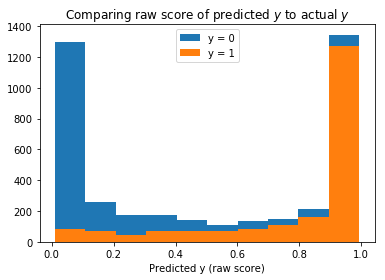

In [190]:
# Making pretty plots...not for use in submission
y_val_predictions = model.predict(x_val, verbose=1)
y_val_predictions = y_val_predictions.flatten()
lst = (y_val_predictions >= 0.5).astype(int)
print("Raw prediction scores: ", y_val_predictions)
print("Predictions (picking raw_score >= 0.5 as positives): ", lst)
print("Actual y values: ", y_val)
print("Number of correct predictions: ", (y_val == lst).sum())
print("Number of incorrect predictions: ", (y_val != lst).sum())
y_val_predictions_0 = y_val_predictions[(np.where(y_val == 0)[0])]
y_val_predictions_1 = y_val_predictions[(np.where(y_val == 1)[0])]
plt.clf()
plt.title("Comparing raw score of predicted $y$ to actual $y$")
plt.hist(np.concatenate((y_val_predictions_0, y_val_predictions_1)), stacked=True, label="y = 0")
plt.hist(y_val_predictions_1, stacked=True, label="y = 1")
plt.xlabel("Predicted y (raw score)")
plt.legend()
plt.show()

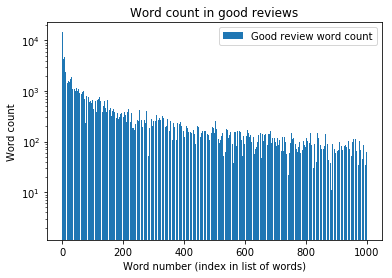

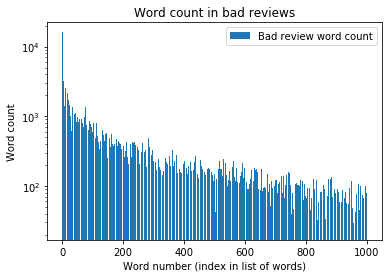

In [167]:
# Making pretty plots...not for use in submission
bad_reviews = x_train_original[(np.where(y_train_original == 0)[0])]
good_reviews = x_train_original[(np.where(y_train_original == 1)[0])]
# counts are sum of elements in columns
bad_word_counts = np.sum(bad_reviews, axis = 0)
good_word_counts = np.sum(good_reviews, axis = 0)
#print(len(bad_word_counts))
#print(len(good_word_counts))

plt.clf()
plt.title("Word count in good reviews")
plt.bar(np.arange(len(words) - 1), good_word_counts, log=True, label="Good review word count")
plt.xlabel("Word number (index in list of words)")
plt.ylabel("Word count")
plt.legend()
plt.show()

plt.title("Word count in bad reviews")
plt.bar(np.arange(len(words) - 1), bad_word_counts, log=True, label="Bad review word count")
plt.xlabel("Word number (index in list of words)")
plt.ylabel("Word count")
plt.legend()
plt.show()

Words sorted in order from good to bad:  ['awesom', 'excel', 'fantast', 'perfect', 'highli', 'amaz', 'solid', 'uniqu', 'captur', 'perfectli', 'hobbit', 'delight', 'batman', 'adventur', 'tivo', 'favorit', 'beauti', 'great', 'fascin', 'bibl', 'easi', 'appreci', 'best', 'famili', 'journey', 'brilliant', 'love', 'heart', 'charm', 'inspir', 'jazz', 'lover', 'fun', 'masterpiec', 'condit', 'wonder', 'soul', 'rock', 'complaint', 'combin', 'town', 'eragon', 'tolkien', 'young', 'grow', 'tale', 'human', 'age', 'enjoy', 'classic', 'world', 'father', 'comfort', 'collect', 'definit', 'lesson', 'sweet', 'deep', 'mom', 'dream', 'touch', 'must', 'share', 'greatest', 'album', 'illustr', 'quick', 'entertain', 'histori', 'summer', 'satisfi', 'magic', 'de', 'truli', 'cultur', 'faith', 'bring', 'shoe', 'alway', 'vocal', 'eye', 'strong', 'natur', 'earli', 'trip', 'everyon', 'glad', 'relationship', 'defin', 'beat', 'emot', 'wow', 'fiction', 'abil', 'travel', 'life', 'live', 'hook', 'simpl', 'recommend', 'gift

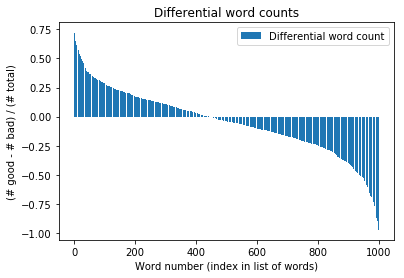

In [189]:
# for each word, differential_count = (# good - # bad) / (# total)
differential_counts = (good_word_counts - bad_word_counts) / (good_word_counts + bad_word_counts)
# words in order of decreasing differential
decreasing_differential_words = [x for _,x in (sorted(list(zip(differential_counts, words[1:]))))[::-1]]
decreasing_differential_counts = sorted(differential_counts)[::-1]
print("Words sorted in order from good to bad: ", decreasing_differential_words)
#print(decreasing_differential_counts)
plt.title("Differential word counts")
plt.bar(np.arange(len(words) - 1), decreasing_differential_counts, label="Differential word count")
plt.xlabel("Word number (index in list of words)")
plt.ylabel("(# good - # bad) / (# total)")
plt.legend()
plt.show()

In [71]:
# evaluate
loss, acc = model.evaluate(x_val, y_val, verbose=0)
print('Validation Accuracy: %f' % (acc*100))

Validation Accuracy: 85.100000


In [72]:
predictions = model.predict(x_test, verbose=1)
predictions = predictions.flatten()

10000/10000 [==============================] - 1s 52us/step


[0.97559017 0.98562104 0.23620868 ... 0.01260216 0.988957   0.03378641]
[1 1 0 ... 0 1 0]


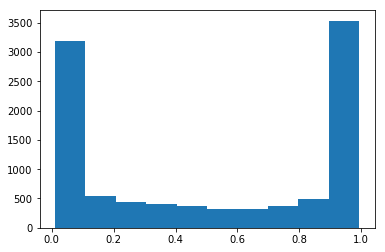

In [73]:
print(predictions)
lst = (predictions >= 0.5).astype(int)
print(lst)
plt.hist(predictions)
plt.show()

In [191]:
#print(words)

In [74]:
make_submission_file(lst)

In [148]:
# Random forest model

def classification_err(y, real_y):
    """
    This function returns the classification error between two equally-sized vectors of 
    labels; this is the fraction of samples for which the labels differ.
    
    Inputs:
        y: (N, ) shaped array of predicted labels
        real_y: (N, ) shaped array of true labels
    Output:
        Scalar classification error
    """
    tot_err = 0
    
    # Count how many samples the labels differ between the two vectors
    for i in range(len(y)):
        if y[i] != real_y[i]:
            tot_err += 1
    
    # Get the fraction of samples for which the labels differ
    classification_error = float(tot_err) / len(y)
    
    return classification_error
    
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    val_err = []
    
    # Use minimum leaf size parameters to create, train, and test a classifier

    # Make a new copy of the classifier, which allows us to "forget" about the
    # fitting from the previous min_leaf value
    for depth in max_depth:
        clf_copy = base.clone(clf)
        clf_copy.set_params(max_depth=depth)
        clf_copy.fit(X_train, y_train)

        train_predict = clf_copy.predict(X_train)
        test_predict = clf_copy.predict(X_test)

        train_err.append(classification_err(train_predict, y_train))
        val_err.append(classification_err(test_predict, y_test))

    return train_err, val_err



n_estimators = 100
clf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'gini')

max_depth = np.arange(10, 51)

train_err, test_err = eval_tree_based_model_max_depth(clf, max_depth, x_train, y_train, x_val, y_val)

KeyboardInterrupt: 

In [ ]:
x_train = training_data[:, 1:]
y_train = training_data[:, 0]
x_test = test_data

def random_forest_predict(clf, max_depth, X_train, y_train, X_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    val_err = []
    
    # Use minimum leaf size parameters to create, train, and test a classifier

    # Make a new copy of the classifier, which allows us to "forget" about the
    # fitting from the previous min_leaf value
    clf_copy = base.clone(clf)
    clf_copy.set_params(max_depth= max_depth)
    clf_copy.fit(X_train, y_train)

    train_predict = clf_copy.predict(X_train)
    test_predict = clf_copy.predict(X_test)

    train_err.append(classification_err(train_predict, y_train))

    return train_err, test_predict

train_err, test_predict = random_forest_predict(clf, 49, x_train, y_train, x_test)

print(train_err)

print(test_predict)

In [144]:
test_predict.astype(int)

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
plt.figure()
plt.plot(max_depth, test_err, label='Testing error')
plt.plot(max_depth, train_err, label='Training error')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Validation error')
plt.title('Decision Tree with Gini Impurity and Maximum Tree Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test error minimized at max_depth = %i' % max_depth[np.argmin(test_err)])

In [145]:
make_submission_file(test_predict.astype(int))

In [133]:
print(len(test_predict))

10000
